### Problem Statement

### Import and add dependncy

In [ ]:
!pip install tensorflow opencv-python mediapipe scikit-learn matplotlib

In [2]:
import time
import numpy as np
from matplotlib import pyplot as plt
import os#Work with filepaths
import cv2#Open Cv
import mediapipe as mp
#To split data for training and testing 
from sklearn.model_selection import train_test_split
#To convert data into one encoded data
from tensorflow.keras.utils import to_categorical
#Importing sequential model,LSTM layer and dense layer
from tensorflow.keras.models import Sequential #Allows us to build sequential neural model
from tensorflow.keras.layers import LSTM,Dense
from tensorflow.keras.callbacks import TensorBoard
#tensorboard --logdir=. use this to check logs
#It allows us to logging inside tensorboard to trace and moniter our model as it is training
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score

### Taking keypoints using mediapipe holistics

In [3]:
#Setting up mediapipe holistic's
#Media pipe holistic to make detection
#Media pipe drawing will draw those points
#We will create them as function to easily access them
mp_holistic=mp.solutions.holistic#Holistic model
mp_drawing=mp.solutions.drawing_utils#Drawing the utilites

In [4]:
type(mp_holistic)
mp_holistic.HandLandmark

<enum 'HandLandmark'>

In [5]:
#Creating mediapipe detection function
def mediapipe_detection(image,model):
    #To the function we pass image and holistic model for detection
    #So when wwe get feed from opencv it is of format bgr(blue,green,red)
    #For detection we need them to be rgb we will change that using opencv
    #Here image is the frames from opencv
    image=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)#Color conversion
    image.flags.writeable=False#Image is no longer writeable
    results=model.process(image)#Making detection
    image=cv2.cvtColor(image,cv2.COLOR_RGB2BGR)#Color conversion
    image.flags.writeable=True#Image is writeable again
    return image,results #Returning the results

In [5]:
#To draw the points onto the image
def draw_landmarks(image,results):
    #drawing landmarks using mp_drawings.draw_landmark
    #For Face
    mp_drawing.draw_landmarks(image,results.face_landmarks,mp_holistic.FACEMESH_TESSELATION)
    #For Pose
    mp_drawing.draw_landmarks(image,results.pose_landmarks,mp_holistic.POSE_CONNECTIONS)
    #For Left Hand
    mp_drawing.draw_landmarks(image,results.left_hand_landmarks,mp_holistic.HAND_CONNECTIONS)
    #For Right Hand
    mp_drawing.draw_landmarks(image,results.right_hand_landmarks,mp_holistic.HAND_CONNECTIONS)
    #Pose landmark shows what landmark connected to other landmarks

In [6]:
mp_holistic.FACEMESH_TESSELATION

frozenset({(18, 17),
           (82, 38),
           (8, 9),
           (456, 248),
           (167, 2),
           (303, 271),
           (69, 104),
           (253, 450),
           (41, 42),
           (315, 16),
           (73, 74),
           (339, 373),
           (258, 385),
           (105, 63),
           (219, 48),
           (304, 272),
           (236, 217),
           (231, 22),
           (85, 84),
           (365, 367),
           (237, 218),
           (243, 112),
           (436, 427),
           (409, 410),
           (248, 456),
           (330, 266),
           (136, 135),
           (88, 95),
           (394, 430),
           (107, 108),
           (118, 117),
           (439, 438),
           (442, 443),
           (260, 466),
           (115, 48),
           (342, 276),
           (121, 128),
           (200, 421),
           (113, 124),
           (132, 137),
           (23, 230),
           (343, 357),
           (443, 444),
           (62, 78),
           (26,

In [7]:
#Formatted draw style landmarks
def draw_styled_landmarks(image,result):
    #For Face
    mp_drawing.draw_landmarks(image,results.face_landmarks,mp_holistic.FACEMESH_TESSELATION
                              #color landmark
                             ,mp_drawing.DrawingSpec(color=(80,110,10),thickness=1,circle_radius=1)
                             #color connections
                             ,mp_drawing.DrawingSpec(color=(80,256,121),thickness=1,circle_radius=1))
    #For Pose
    mp_drawing.draw_landmarks(image,results.pose_landmarks,mp_holistic.POSE_CONNECTIONS
                             #color landmark
                             ,mp_drawing.DrawingSpec(color=(80,22,10),thickness=2,circle_radius=4)
                             #color connections
                             ,mp_drawing.DrawingSpec(color=(80,44,121),thickness=2,circle_radius=2))
    #For Left Hand
    mp_drawing.draw_landmarks(image,results.left_hand_landmarks,mp_holistic.HAND_CONNECTIONS
                             #color landmark
                             ,mp_drawing.DrawingSpec(color=(121,22,76),thickness=2,circle_radius=4)
                             #color connections
                             ,mp_drawing.DrawingSpec(color=(121,44,250),thickness=2,circle_radius=2))
    #For Right Hand
    mp_drawing.draw_landmarks(image,results.right_hand_landmarks,mp_holistic.HAND_CONNECTIONS
                             #color landmark
                             ,mp_drawing.DrawingSpec(color=(245,117,66),thickness=2,circle_radius=4)
                             #color connections
                             ,mp_drawing.DrawingSpec(color=(245,66,230),thickness=2,circle_radius=2))

In [65]:
#Accessing video through webcm using OpenCV
#We loop thorugh all frames in camera to create video
cap=cv2.VideoCapture(0)#To acccess our webcam 
#here 0 represents device

#Accessing the holistic model
with mp_holistic.Holistic(min_detection_confidence=0.5,min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():#It checks wheather we are accessing or not
        #Read feed
        ret,frame=cap.read()#It reads our frames
        
        #Make detections
        image,results=mediapipe_detection(frame,holistic)
        print("frame",frame)
        print("image",image)
        #Drwing Landmarks
        draw_styled_landmarks(image,results)
        
        #To showw to screen
        #Rendering
        cv2.imshow("OpenCv Feed",image)

        #To Exit o break the feed
        if cv2.waitKey(10) & 0xFF==ord('q'):
            break #it waits and if we press q breaks the loop
    cap.release()#It releases the webcam
    cv2.destroyAllWindows()#Destroy the cv window

frame [[[116 117 113]
  [112 118 112]
  [108 119 111]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[116 117 113]
  [114 118 112]
  [112 118 111]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[114 117 115]
  [114 118 112]
  [114 119 109]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 ...

 [[ 29  32  30]
  [ 30  32  29]
  [ 31  32  28]
  ...
  [ 66  66  66]
  [ 65  65  65]
  [ 65  65  65]]

 [[ 29  32  30]
  [ 30  32  30]
  [ 31  32  30]
  ...
  [ 67  67  67]
  [ 65  65  65]
  [ 65  65  65]]

 [[ 31  32  30]
  [ 31  32  29]
  [ 31  32  28]
  ...
  [ 67  68  67]
  [ 66  66  66]
  [ 65  65  65]]]
image [[[116 117 113]
  [112 118 112]
  [108 119 111]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[116 117 113]
  [114 118 112]
  [112 118 111]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[114 117 115]
  [114 118 112]
  [114 119 109]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 ...

 [[ 29  32  30]
  [ 30  32  29]
  [ 31  

frame [[[120 122 122]
  [121 122 122]
  [122 122 122]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[120 122 122]
  [120 122 122]
  [120 122 122]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[122 122 122]
  [121 122 122]
  [120 122 122]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 ...

 [[ 30  34  29]
  [ 31  34  29]
  [ 32  34  29]
  ...
  [ 73  72  73]
  [ 74  71  74]
  [ 74  71  74]]

 [[ 32  34  27]
  [ 32  34  28]
  [ 32  34  29]
  ...
  [ 72  71  78]
  [ 72  71  78]
  [ 72  71  78]]

 [[ 32  35  25]
  [ 32  34  29]
  [ 32  33  33]
  ...
  [ 72  70  78]
  [ 72  71  78]
  [ 72  71  78]]]
image [[[120 122 122]
  [121 122 122]
  [122 122 122]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[120 122 122]
  [120 122 122]
  [120 122 122]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[122 122 122]
  [121 122 122]
  [120 122 122]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 ...

 [[ 30  34  29]
  [ 31  34  29]
  [ 32  

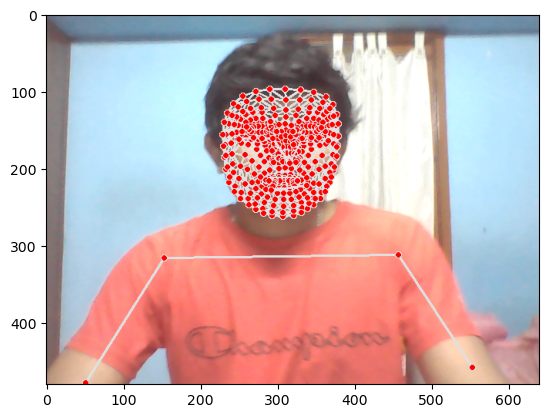

In [45]:
draw_landmarks(frame,results)
plt.imshow(frame)
#This show last frame captured
#Color Conversion
plt.imshow(cv2.cvtColor(frame,cv2.COLOR_BGR2RGB))

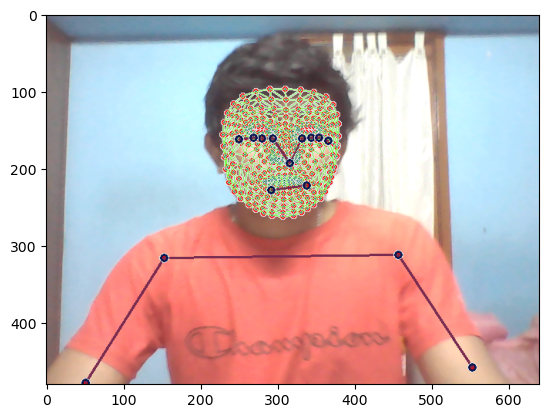

In [46]:
draw_styled_landmarks(frame,results)
plt.imshow(frame)
#This show last frame captured
#Color Conversion
plt.imshow(cv2.cvtColor(frame,cv2.COLOR_BGR2RGB))

### Extract Keypoints

In [8]:
#Obtaining values using list comprenhension
def extract_keypoints(results):
    #Pose
    # If else statement returns zero array if results is empty
    pose=np.array([[res.x,res.y,res.z,res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(132)
    #We need to flatten it to get in one array
    #Left hand
    lh=np.array([[res.x,res.y,res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(63)
    #Right hand
    rh=np.array([[res.x,res.y,res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(63)
    #Face
    face=np.array([[res.x,res.y,res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(1404)
    #returning the values in a single concatenated array
    return np.concatenate([pose,face,lh,rh])

In [ ]:
extract_keypoints(results).shape

### Setup folders for collection

In [9]:
#Path for exported data,Numpyarray
DATA_PATH=os.path.join('MP_data')

#Actions we are going to try to detect
actions=np.array(['hello','thanks','loveyou'])
#We use 30 different frames of data to detect actions
#30 videos worth of data
no_sequences=30
#Videos are going to be length of 30 frames
sequence_length=30

In [ ]:
#Creating folders to save the data
for action in actions:
    for sequence in range(no_sequences):
        try:
            #makedirs will create sub folders
            os.makedirs(os.path.join(DATA_PATH,action,str(sequence)))
        except:
            pass
#We will create 30 folders for every actions

### Collecting data for training and testing

In [ ]:
#Accessing video through webcm using OpenCV
#We loop thorugh all frames in camera to create video
cap=cv2.VideoCapture(0)#To acccess our webcam 
#here 0 represents device

#Accessing the holistic model
with mp_holistic.Holistic(min_detection_confidence=0.5,min_tracking_confidence=0.5) as holistic:
    #Loop through actions:hello,thanks etc
    for action in actions:
        #Loop through videos each action 30 videos
        for sequence in range(no_sequences):
            #Loop through each frame per video 30 frames
            for frame_num in range(sequence_length):
                #Read feed
                ret,frame=cap.read()#It reads our frames

                #Make detections
                image,results=mediapipe_detection(frame,holistic)

                #Drwing Landmarks
                draw_styled_landmarks(image,results)
                    
                #Applying wait logic 
                #To give break between videos and say to user what video he is at
                if frame_num==0:
                    cv2.putText(image,'STARTING COLLECION',(120,200),
                                   cv2.FONT_HERSHEY_SIMPLEX,1,(0,255,0),4,cv2.LINE_AA)
                    cv2.putText(image,f'Collecting frames for {action} Video number {sequence}'
                                    ,(15,12),cv2.FONT_HERSHEY_SIMPLEX,0.5,(0,0,255),1,cv2.LINE_AA)
                    cv2.waitKey(2000)#This waits for 2 second after every video captured
                    
                else:
                    cv2.putText(image,f'Collecting frames for {action} Video number {sequence}'
                                    ,(15,12),cv2.FONT_HERSHEY_SIMPLEX,0.5,(0,0,255),1,cv2.LINE_AA)

                #Extracting the keypoints
                keypoints=extract_keypoints(results)
                #Saving the extracted keypoints
                #Path to save the key points
                npy_path=os.path.join(DATA_PATH,action,str(sequence),str(frame_num))
                #Saving keypoints
                np.save(npy_path,keypoints)
                    
                #To show to screen
                #Rendering
                cv2.imshow("OpenCv Feed",image)

                #To Exit o break the feed
                if cv2.waitKey(10) & 0xFF==ord('q'):
                    break #it waits and if we press q breaks the loop
    cap.release()#It releases the webcam
    cv2.destroyAllWindows()#Destroy the cv window

In [ ]:
#To destroy open cv in middle
cap.release()#It releases the webcam
cv2.destroyAllWindows()#Destroy the cv window

### Preprocessing Data and Creating Labels

In [10]:
#Creating label map
label_map={label:num for num,label in enumerate(actions)}

In [11]:
label_map
#We created dictionary for labels with set of id

{'hello': 0, 'thanks': 1, 'loveyou': 2}

In [12]:
#In preprocessing we put every frame np file in single one

In [13]:
#Creating 2 blank arrays
sequences,labels=[],[]
#here sequences represent our feature data(x) and labels represent labels(y)
#Going through our actions
for action in actions:
    #Going through our 30 videos
    for sequence in range(no_sequences):
        #Creating a blank array window
        window=[]
        #Going through each frames
        for frame_num in range(sequence_length):
            #Loading up the respective frame using np.load()
            res=np.load(os.path.join(DATA_PATH,action,str(sequence),f"{frame_num}.npy"))
            #Adding the value to the window array
            print(res)
            window.append(res)
        sequences.append(window)
        labels.append(label_map[action])

[ 0.53316677  0.51246411 -1.15837407 ...  0.          0.
  0.        ]
[ 0.53625101  0.56368196 -1.19923615 ...  0.39377213  0.29293865
 -0.01883467]
[ 0.53835422  0.57232577 -1.19654667 ...  0.39214599  0.29512265
 -0.01889087]
[ 0.53891051  0.57860911 -1.19363427 ...  0.39359024  0.29590318
 -0.01519801]
[ 0.53914207  0.58111727 -1.1892035  ...  0.39277944  0.29678228
 -0.01560478]
[ 0.53749025  0.58275443 -1.28213179 ...  0.3922863   0.29380634
 -0.01977629]
[ 0.53303921  0.58212948 -1.29525244 ...  0.39375058  0.29127747
 -0.01606657]
[ 0.53024435  0.58285767 -1.27013588 ...  0.38737106  0.29633319
 -0.01552198]
[ 0.52779204  0.58106345 -1.31916416 ...  0.36694098  0.27612159
 -0.01156615]
[ 0.5271154   0.5809269  -1.30439985 ...  0.36535716  0.27915788
 -0.01530807]
[ 0.52289212  0.57910252 -1.28774858 ...  0.          0.
  0.        ]
[ 0.51913655  0.57603228 -1.27715421 ...  0.          0.
  0.        ]
[ 0.51505107  0.57465935 -1.27373374 ...  0.          0.
  0.        ]
[ 0.5

[ 0.57065231  0.62471426 -1.00629437 ...  0.20224059  0.11087473
 -0.02659345]
[ 0.56880832  0.62821376 -1.01836085 ...  0.20398095  0.11311413
 -0.02128465]
[ 0.56784433  0.63039702 -1.02266145 ...  0.20398334  0.11230002
 -0.02282496]
[ 0.56737584  0.63383716 -0.99690306 ...  0.23508552  0.13414712
 -0.02418622]
[ 0.55858296  0.64597118 -1.03634787 ...  0.4076156   0.35860178
 -0.02891492]
[ 0.55427599  0.65084225 -1.05274224 ...  0.40879494  0.36065269
 -0.03057668]
[ 0.55293828  0.6534242  -1.04760349 ...  0.40959811  0.36064434
 -0.03056879]
[ 0.55222929  0.65449774 -1.04124904 ...  0.40976733  0.36094028
 -0.03039455]
[ 0.55128157  0.65704179 -1.02970386 ...  0.40957534  0.36026233
 -0.02940616]
[ 0.55028498  0.65667981 -1.03273118 ...  0.40813407  0.35770643
 -0.02487388]
[ 0.54997981  0.65633786 -1.03375232 ...  0.4081333   0.3573789
 -0.02295728]
[ 0.55011618  0.65613979 -1.03324986 ...  0.38603288  0.32421148
 -0.02386626]
[ 0.55023938  0.65592688 -1.02975166 ...  0.37857783 

[ 0.44487053  0.58410645 -0.84471178 ...  0.          0.
  0.        ]
[ 0.44525295  0.58388686 -0.86435443 ...  0.          0.
  0.        ]
[ 0.44550219  0.58375257 -0.87454939 ...  0.          0.
  0.        ]
[ 0.44606581  0.58522534 -0.92537099 ...  0.          0.
  0.        ]
[ 0.44650072  0.5862779  -0.93843496 ...  0.          0.
  0.        ]
[ 0.44708371  0.58926147 -0.93704224 ...  0.          0.
  0.        ]
[ 0.44738632  0.59125012 -0.92696893 ...  0.          0.
  0.        ]
[ 0.44798183  0.59180903 -0.8901726  ...  0.          0.
  0.        ]
[ 0.44878203  0.59320509 -0.8955552  ...  0.          0.
  0.        ]
[ 0.44926324  0.59391075 -0.91637325 ...  0.          0.
  0.        ]
[ 0.44961038  0.59409297 -0.87309313 ...  0.          0.
  0.        ]
[ 0.44966754  0.59414345 -0.82420844 ...  0.          0.
  0.        ]
[ 0.44972911  0.59416109 -0.8388114  ...  0.          0.
  0.        ]
[ 0.44979316  0.59420735 -0.85174596 ...  0.          0.
  0.        ]
[ 0.45

[ 0.4528144   0.6052506  -0.82923555 ...  0.          0.
  0.        ]
[ 0.4523901   0.60463184 -0.84364605 ...  0.          0.
  0.        ]
[ 0.45238629  0.6029892  -0.83042794 ...  0.          0.
  0.        ]
[ 0.45238385  0.60210621 -0.82544422 ...  0.          0.
  0.        ]
[ 0.45250553  0.60192519 -0.82467014 ...  0.          0.
  0.        ]
[ 0.45259246  0.6014446  -0.80656606 ...  0.          0.
  0.        ]
[ 0.45259935  0.60149914 -0.7750538  ...  0.          0.
  0.        ]
[ 0.45266548  0.60153633 -0.77227491 ...  0.          0.
  0.        ]
[ 0.45264536  0.60159433 -0.77108324 ...  0.          0.
  0.        ]
[ 0.4526287   0.60165316 -0.76857686 ...  0.          0.
  0.        ]
[ 0.45265073  0.6025098  -0.75526398 ...  0.          0.
  0.        ]
[ 0.45276469  0.60317791 -0.71462584 ...  0.          0.
  0.        ]
[ 0.45300284  0.60343647 -0.83922386 ...  0.          0.
  0.        ]
[ 0.45363289  0.61206764 -0.89415628 ...  0.          0.
  0.        ]
[ 0.45

[ 0.57919765  0.62017131 -1.08178401 ...  0.12417646  0.02301884
 -0.02780669]
[ 0.57930124  0.62032056 -1.08892667 ...  0.11193398  0.00219767
 -0.02820742]
[ 0.57869762  0.62220746 -1.14442372 ...  0.12110912  0.02813368
 -0.02974088]
[ 0.5776931   0.62447822 -1.14059663 ...  0.12262531  0.02955025
 -0.02968713]
[ 0.57638335  0.62773246 -1.1280787  ...  0.15409037  0.04333974
 -0.02248553]
[ 0.57589906  0.62896287 -1.12199378 ...  0.15330496  0.04346007
 -0.02361901]
[ 0.575463    0.62905771 -1.11481416 ...  0.19058794  0.07781909
 -0.00242069]
[ 0.57512963  0.62910712 -1.11245954 ...  0.19253431  0.08033127
 -0.00543065]
[ 5.73480189e-01  6.29696071e-01 -1.11107326e+00 ...  2.63476312e-01
  1.03233583e-01  3.45124135e-04]
[ 0.56997544  0.63186198 -1.08602488 ...  0.3153699   0.15450406
 -0.01470772]
[ 0.56990504  0.63139313 -1.08415341 ...  0.35045269  0.20079468
 -0.00776249]
[ 0.56936562  0.63125694 -1.0843519  ...  0.34798247  0.20309344
 -0.01580641]
[ 0.5693655   0.63125491 -1.

[ 0.45642692  0.67646223 -0.60205072 ...  0.          0.
  0.        ]
[ 0.45704556  0.68088096 -0.55388939 ...  0.          0.
  0.        ]
[ 0.45717645  0.68350971 -0.54754913 ...  0.          0.
  0.        ]
[ 0.45744395  0.68993014 -0.53546721 ...  0.          0.
  0.        ]
[ 0.45759124  0.69265074 -0.53262812 ...  0.          0.
  0.        ]
[ 0.45834836  0.69461167 -0.58870876 ...  0.          0.
  0.        ]
[ 0.45880556  0.69618064 -0.60896397 ...  0.          0.
  0.        ]
[ 0.46108857  0.69478613 -0.61678803 ...  0.          0.
  0.        ]
[ 0.46272653  0.69344145 -0.58419222 ...  0.          0.
  0.        ]
[ 0.46392885  0.6920355  -0.56850773 ...  0.          0.
  0.        ]
[ 0.46394438  0.69120115 -0.56210071 ...  0.          0.
  0.        ]
[ 0.46396956  0.69050968 -0.56672019 ...  0.          0.
  0.        ]
[ 0.46362036  0.68966609 -0.55040592 ...  0.          0.
  0.        ]
[ 0.46330389  0.68945003 -0.63196254 ...  0.          0.
  0.        ]
[ 0.46

[ 0.5798822   0.66765118 -1.4262085  ...  0.05741695  0.08275321
 -0.04256757]
[ 0.57642937  0.66691947 -1.41781604 ...  0.06017913  0.08633383
 -0.04417681]
[ 0.57503426  0.66647083 -1.41057062 ...  0.06112092  0.08814865
 -0.04525042]
[ 0.5736919   0.66606605 -1.42137074 ...  0.06138587  0.08668312
 -0.05034582]
[ 0.57325327  0.66602337 -1.45290792 ...  0.06612971  0.09667267
 -0.03362866]
[ 0.57330763  0.66651541 -1.46357    ...  0.06790087  0.09619366
 -0.02896061]
[ 0.57353389  0.66842842 -1.45392001 ...  0.09013967  0.12018315
 -0.02217177]
[ 0.57373822  0.67037547 -1.45117772 ...  0.0914828   0.11930414
 -0.02308923]
[ 0.56999981  0.66925228 -1.38730323 ...  0.4131625   0.35067698
 -0.03130939]
[ 0.56821698  0.66807801 -1.27814984 ...  0.41872269  0.35564905
 -0.03274953]
[ 0.56755787  0.66722    -1.30442381 ...  0.41876045  0.35310569
 -0.02866041]
[ 0.56722945  0.66489309 -1.31113529 ...  0.41906759  0.35313356
 -0.02980966]
[ 0.5666576   0.66297227 -1.31263185 ...  0.41917461

[ 0.55036908  0.47921604 -0.50206089 ...  0.53709346  0.61984789
 -0.04083856]
[ 0.54543197  0.47962508 -0.56246698 ...  0.53281367  0.61676592
 -0.03251184]
[ 0.54296952  0.48249844 -0.54501796 ...  0.53357232  0.61843449
 -0.03212887]
[ 0.54749399  0.48314717 -0.52311641 ...  0.51817125  0.60118222
 -0.0887088 ]
[ 0.54870802  0.48252088 -0.52290559 ...  0.51212698  0.60586375
 -0.05262826]
[ 0.54081589  0.48278484 -0.51887965 ...  0.          0.
  0.        ]
[ 0.53011113  0.48100981 -0.56152761 ...  0.42974958  0.59186763
 -0.0928075 ]
[ 0.52939183  0.47942352 -0.69091374 ...  0.39685386  0.59960777
 -0.0886269 ]
[ 0.52896112  0.47963232 -0.70631224 ...  0.39339215  0.60024947
 -0.08501253]
[ 0.52823293  0.47745499 -0.67846644 ...  0.36927849  0.61587757
 -0.09801055]
[ 0.5276677   0.47609526 -0.66962296 ...  0.36902764  0.61552161
 -0.09656854]
[ 0.52764547  0.47564399 -0.62188184 ...  0.35776395  0.62667835
 -0.10528737]
[ 0.52763313  0.47544616 -0.60853952 ...  0.35661918  0.6241

[ 0.48676324  0.48545828 -0.8525508  ...  0.3801378   0.78955477
 -0.13228346]
[ 0.49270481  0.49356526 -0.86002141 ...  0.39122349  0.77132481
 -0.11629204]
[ 0.49602732  0.49729145 -0.87297523 ...  0.39226958  0.77051491
 -0.10278632]
[ 0.49564791  0.50679451 -0.93897378 ...  0.39998195  0.75662678
 -0.08805104]
[ 0.49567968  0.5123595  -0.8199383  ...  0.4067505   0.74596602
 -0.09546074]
[ 0.49636966  0.51965559 -0.68728137 ...  0.41434258  0.74088711
 -0.08130735]
[ 0.49627614  0.5271008  -0.63114536 ...  0.47960332  0.66226345
 -0.04878251]
[ 0.4962303   0.52940136 -0.56052959 ...  0.48002088  0.66361672
 -0.04843711]
[ 0.49751019  0.52866799 -0.50975901 ...  0.48276377  0.66200125
 -0.04512597]
[ 0.49783787  0.52773309 -0.5333727  ...  0.48330683  0.66168821
 -0.04612003]
[ 0.49793854  0.52705282 -0.54728109 ...  0.48284799  0.6613698
 -0.04642714]
[ 0.49799472  0.52743816 -0.55834287 ...  0.48404452  0.66244984
 -0.04652463]
[ 0.49801487  0.52721673 -0.58762681 ...  0.48638159 

[ 0.50743151  0.49958903 -1.0587585  ...  0.31554666  0.89960569
 -0.12060624]
[ 0.5086624   0.50011164 -1.03480601 ...  0.32417285  0.90035427
 -0.13088296]
[ 0.51076019  0.50081956 -1.02848029 ...  0.32105097  0.89968336
 -0.11696612]
[ 0.51185906  0.50089478 -1.03940725 ...  0.32651338  0.89896709
 -0.12018821]
[ 0.51246417  0.5015617  -1.0802685  ...  0.32210094  0.89980906
 -0.12135945]
[ 0.51288086  0.50160116 -1.02647734 ...  0.32532153  0.89781165
 -0.15090223]
[ 0.51295149  0.50165302 -0.93908042 ...  0.32054034  0.89749992
 -0.10889862]
[ 0.51299399  0.50161612 -0.90779179 ...  0.32476255  0.90123749
 -0.13574217]
[ 0.51301259  0.50160569 -0.83533418 ...  0.31834623  0.89131761
 -0.12962763]
[ 0.51301271  0.50195241 -0.98498309 ...  0.32722911  0.89818686
 -0.13324355]
[ 0.5138095   0.50195616 -0.63132262 ...  0.50116217  0.6531952
 -0.04463471]
[ 0.51585191  0.50344437 -0.64550483 ...  0.50021231  0.64981461
 -0.04610422]
[ 0.51809931  0.5045287  -0.6705972  ...  0.50092191 

[ 0.5273174   0.49689114 -1.21248555 ...  0.34178925  0.8563081
 -0.13470253]
[ 0.52730101  0.49731877 -1.17931378 ...  0.3457436   0.86006606
 -0.12115798]
[ 0.52716148  0.49771234 -1.14020252 ...  0.34179142  0.85733503
 -0.1298099 ]
[ 0.52715337  0.49879456 -1.06630301 ...  0.35127017  0.86292619
 -0.12041081]
[ 0.52714539  0.49950975 -1.04536092 ...  0.35124898  0.85845214
 -0.1358736 ]
[ 0.52753133  0.50125772 -1.06710899 ...  0.34510073  0.85504037
 -0.13371378]
[ 0.5276407   0.50160873 -1.04003978 ...  0.35358393  0.86147076
 -0.13754137]
[ 0.52760804  0.50187093 -1.052724   ...  0.35678834  0.85269839
 -0.12224144]
[ 0.52749622  0.5038377  -1.04892468 ...  0.35211551  0.85453326
 -0.1427718 ]
[ 0.52739751  0.50525934 -1.04631066 ...  0.35531968  0.85272384
 -0.12471347]
[ 0.52866322  0.50672537 -1.04459894 ...  0.35888845  0.84973359
 -0.12448002]
[ 0.52904165  0.50911003 -1.03325081 ...  0.35639822  0.85309529
 -0.13489661]
[ 0.52928197  0.5103634  -1.02349496 ...  0.35792851 

[ 0.39347667  0.56915867 -1.14004493 ...  0.          0.
  0.        ]
[ 0.39189294  0.56833369 -1.11958337 ...  0.          0.
  0.        ]
[ 0.39599466  0.56661832 -0.72563493 ...  0.          0.
  0.        ]
[ 0.39786765  0.56238002 -0.52107871 ...  0.08043747  0.83790904
 -0.00875162]
[ 0.39966634  0.56047195 -0.41489473 ...  0.08289254  0.95653886
  0.02577098]
[ 0.40046954  0.55629104 -0.40393853 ...  0.02033576  0.93625975
  0.00279302]
[ 0.40095073  0.5547657  -0.39576635 ... -0.00390439  0.90978944
  0.06033017]
[ 0.40113968  0.55360794 -0.38963655 ...  0.02676831  0.9535746
 -0.0270041 ]
[ 0.40036327  0.55374199 -0.41257352 ...  0.02125484  0.99472541
 -0.06521709]
[ 0.39770868  0.55373532 -0.40436068 ...  0.01487701  0.9734031
 -0.06396787]
[ 0.39653206  0.5534851  -0.45033422 ... -0.00479849  0.98499435
 -0.03241972]
[ 0.39487845  0.55346662 -0.41760039 ...  0.01054479  0.98184073
 -0.06354591]
[ 0.39442509  0.55343843 -0.40217972 ... -0.00783787  0.96151924
 -0.03898519]

[ 0.66272515  0.56298411 -0.62730682 ...  0.79954487  0.8056128
  0.00343762]
[ 0.66238481  0.56297135 -0.67501253 ...  0.79159528  0.78149199
 -0.00204271]
[ 0.66120255  0.56352866 -0.63296521 ...  0.77302021  0.76489031
  0.00327272]
[ 0.65885794  0.56529802 -0.63413656 ...  0.73990715  0.74712765
 -0.00543953]
[ 0.65690529  0.56801212 -0.48035845 ...  0.61893386  0.6891306
  0.05113639]
[ 0.65610296  0.56918323 -0.44907999 ...  0.61859238  0.68571413
  0.02385615]
[ 0.65612346  0.57034558 -0.41011539 ...  0.61518759  0.69031179
  0.03785126]
[ 0.65623873  0.57066673 -0.39402598 ...  0.61777103  0.68584681
  0.03399248]
[ 0.65631616  0.57093543 -0.39153427 ...  0.61819297  0.68461663
  0.03391701]
[ 0.6563397   0.57269865 -0.49438173 ...  0.62227738  0.68406659
  0.03714946]
[ 0.65640926  0.57272869 -0.60219866 ...  0.62864888  0.688021
  0.02705411]
[ 0.65659368  0.56870049 -0.61177123 ...  0.63704097  0.73752195
 -0.0016893 ]
[ 0.65656298  0.56856835 -0.88959152 ...  0.6553542   0.

[ 0.55051678  0.52512479 -1.12465811 ...  0.43441504  0.79945141
 -0.10724519]
[ 0.5504545   0.52600169 -1.11494851 ...  0.43754172  0.79705083
 -0.10187874]
[ 0.55040812  0.52955192 -1.19484639 ...  0.43757164  0.79764986
 -0.09687501]
[ 0.55036336  0.53162271 -1.19399369 ...  0.43733141  0.79614019
 -0.0938738 ]
[ 0.55029392  0.53426772 -1.20111299 ...  0.4366928   0.79700935
 -0.09158401]
[ 0.55029541  0.53402722 -1.20754254 ...  0.43593502  0.79830211
 -0.08935305]
[ 0.54986304  0.53369504 -0.76030827 ...  0.52400309  0.66372484
 -0.04580114]
[ 0.54960614  0.53332114 -0.77032161 ...  0.52099943  0.66058701
 -0.04747114]
[ 0.54927188  0.53326589 -0.72316337 ...  0.51976842  0.66143042
 -0.04718057]
[ 0.54921722  0.53315693 -0.81351864 ...  0.51898634  0.6641255
 -0.04470069]
[ 0.54914606  0.53304064 -0.84352207 ...  0.51846343  0.6665045
 -0.04655703]
[ 0.54901206  0.53294998 -0.84518468 ...  0.51869678  0.66694069
 -0.04488551]
[ 0.54843175  0.5340212  -0.86331624 ...  0.51479965  

[ 0.60432839  0.60537589 -0.90948361 ...  0.          0.
  0.        ]
[ 0.60998356  0.60478562 -1.13479257 ...  0.24749938  0.44779119
 -0.05088127]
[ 0.61408967  0.60446846 -1.23235619 ...  0.24746242  0.37055692
 -0.03710302]
[ 0.61814469  0.6034348  -1.20393395 ...  0.24574667  0.37099662
 -0.05019429]
[ 0.62185127  0.60312587 -1.19734061 ...  0.24553773  0.32268041
 -0.03669339]
[ 0.62502563  0.60297167 -1.18231332 ...  0.25122601  0.30310035
 -0.03524291]
[ 0.63206041  0.60361677 -1.17525911 ...  0.25946897  0.29215288
 -0.03479431]
[ 0.63406867  0.60389209 -1.17115855 ...  0.25977334  0.2921834
 -0.03554117]
[ 0.63748896  0.60382706 -1.14736819 ...  0.26900113  0.28865805
 -0.03183863]
[ 0.64226973  0.60366619 -1.05821466 ...  0.27448392  0.2856487
 -0.03167405]
[ 0.64557928  0.60357821 -1.08341646 ...  0.2800267   0.28527325
 -0.031312  ]
[ 0.64905256  0.60355562 -1.06121051 ...  0.28204355  0.28391409
 -0.03285016]
[ 0.65074599  0.60365945 -1.05239022 ...  0.28139371  0.284312

[ 0.3789413   0.61398226 -0.65924191 ...  0.          0.
  0.        ]
[ 0.37925914  0.61372554 -0.63163185 ...  0.          0.
  0.        ]
[ 0.37476119  0.61178041 -0.59020817 ...  0.          0.
  0.        ]
[ 0.37187356  0.61177772 -0.65215784 ...  0.          0.
  0.        ]
[ 0.36993659  0.61163455 -0.72786939 ...  0.          0.
  0.        ]
[ 0.37084982  0.61144149 -0.47216693 ...  0.          0.
  0.        ]
[ 0.36417416  0.61177415 -0.45943514 ...  0.          0.
  0.        ]
[ 0.35664147  0.61256814 -0.56676698 ...  0.          0.
  0.        ]
[ 0.35360211  0.61315638 -0.54672307 ...  0.          0.
  0.        ]
[ 0.35204071  0.61359328 -0.55658072 ...  0.          0.
  0.        ]
[ 0.35154074  0.61407274 -0.62418461 ...  0.          0.
  0.        ]
[ 0.35302374  0.61466604 -0.64579856 ...  0.          0.
  0.        ]
[ 0.35495281  0.6147269  -0.6975354  ...  0.          0.
  0.        ]
[ 0.35600495  0.61480892 -0.71392769 ...  0.          0.
  0.        ]
[ 0.35

[ 0.40335041  0.59466618 -0.74889314 ...  0.          0.
  0.        ]
[ 0.40546408  0.59468842 -0.74873966 ...  0.          0.
  0.        ]
[ 0.40712279  0.59471005 -0.68968707 ...  0.          0.
  0.        ]
[ 0.40845236  0.59475225 -0.67508876 ...  0.          0.
  0.        ]
[ 0.41015774  0.5949108  -0.60768712 ...  0.          0.
  0.        ]
[ 0.41158718  0.59538776 -0.58090389 ...  0.          0.
  0.        ]
[ 0.41564426  0.59524918 -0.78362685 ...  0.          0.
  0.        ]
[ 0.43080291  0.59205878 -0.83088267 ...  0.          0.
  0.        ]
[ 0.43767828  0.59077168 -0.84501565 ...  0.          0.
  0.        ]
[ 0.43911067  0.58936882 -0.80908948 ...  0.          0.
  0.        ]
[ 0.43964237  0.58817428 -0.79663885 ...  0.          0.
  0.        ]
[ 0.44349903  0.58819664 -0.69888508 ...  0.          0.
  0.        ]
[ 0.44570947  0.58820456 -0.63746154 ...  0.          0.
  0.        ]
[ 0.44735909  0.58822709 -0.66644949 ...  0.          0.
  0.        ]
[ 0.44

[ 0.67845839  0.62151879 -0.9108265  ...  0.35996249  0.26185274
 -0.03150775]
[ 0.67860854  0.62171674 -0.93173856 ...  0.36060852  0.26161453
 -0.03282072]
[ 0.67853123  0.62170023 -0.88994181 ...  0.36078915  0.26259249
 -0.03176313]
[ 0.67844748  0.62161893 -0.89816922 ...  0.36031681  0.26461524
 -0.03101678]
[ 0.57778788  0.6242128  -0.82794219 ...  0.          0.
  0.        ]
[ 0.5627073   0.62416756 -0.8536166  ...  0.          0.
  0.        ]
[ 0.5597924   0.62413681 -1.01518273 ...  0.          0.
  0.        ]
[ 0.55995351  0.62450981 -1.17973912 ...  0.          0.
  0.        ]
[ 0.55817407  0.62666112 -1.24287105 ...  0.          0.
  0.        ]
[ 0.55943662  0.62695318 -1.27766502 ...  0.          0.
  0.        ]
[ 0.56045872  0.62695706 -1.30264521 ...  0.          0.
  0.        ]
[ 0.56455147  0.62753946 -1.25586128 ...  0.          0.
  0.        ]
[ 0.5683524   0.62804383 -1.31139731 ...  0.          0.
  0.        ]
[ 0.57049245  0.62859452 -1.32892728 ...  0. 

[ 0.38885909  0.63820761 -0.8253212  ...  0.          0.
  0.        ]
[ 0.38529125  0.63819957 -0.77325696 ...  0.          0.
  0.        ]
[ 0.38340458  0.63864547 -0.79397523 ...  0.          0.
  0.        ]
[ 0.3850942   0.63898301 -0.81336915 ...  0.          0.
  0.        ]
[ 0.3856712   0.63889134 -0.84026259 ...  0.          0.
  0.        ]
[ 0.38501054  0.63668609 -0.81739807 ...  0.          0.
  0.        ]
[ 0.38954997  0.63548338 -0.8337782  ...  0.          0.
  0.        ]
[ 0.39081222  0.63459641 -0.87838095 ...  0.          0.
  0.        ]
[ 0.3939513   0.63218611 -0.71281874 ...  0.          0.
  0.        ]
[ 0.39547095  0.62892085 -0.54603261 ...  0.          0.
  0.        ]
[ 0.39339381  0.62711775 -0.536506   ...  0.          0.
  0.        ]
[ 0.39463812  0.62510401 -0.6445415  ...  0.          0.
  0.        ]
[ 0.39526749  0.62343156 -0.6428951  ...  0.          0.
  0.        ]
[ 0.39370596  0.62240213 -0.65305531 ...  0.          0.
  0.        ]
[ 0.39

[ 0.66618741  0.61708313 -0.92058122 ...  0.310922    0.25904179
 -0.0428428 ]
[ 0.66902512  0.61837447 -0.90713388 ...  0.31757993  0.22093019
 -0.02280847]
[ 0.67004722  0.61837488 -0.83352917 ...  0.31819299  0.22327952
 -0.02836752]
[ 0.6722554   0.61846316 -0.83028305 ...  0.32619128  0.21726397
 -0.03186645]
[ 0.67361718  0.61859792 -0.86218613 ...  0.3253347   0.21743071
 -0.03106707]
[ 0.6732921   0.61954772 -0.85752362 ...  0.33763006  0.21271881
 -0.02813371]
[ 0.67295635  0.62100768 -0.87165391 ...  0.33834448  0.21076669
 -0.02925513]
[ 0.67469943  0.62379152 -0.89137113 ...  0.34098834  0.20406124
 -0.02907969]
[ 0.67818207  0.62527871 -0.89172381 ...  0.33370444  0.19988741
 -0.03500215]
[ 0.67877173  0.62703955 -0.88943177 ...  0.33241084  0.20172431
 -0.0348997 ]
[ 0.68046218  0.62852561 -0.89743948 ...  0.33535188  0.20984186
 -0.03326476]
[ 0.68048489  0.62972218 -0.90138274 ...  0.33516416  0.20872259
 -0.03472082]
[ 0.68206298  0.63331246 -0.9374404  ...  0.33433521

[ 0.71277934  0.65080315 -0.95744437 ...  0.          0.
  0.        ]
[ 0.72005427  0.65008956 -0.96349943 ...  0.29811433  0.29395589
 -0.0374562 ]
[ 0.72607863  0.64792937 -0.89029038 ...  0.32635477  0.25342613
 -0.0391336 ]
[ 0.73006326  0.6469419  -0.87708455 ...  0.32875305  0.25232166
 -0.03708594]
[ 0.73238212  0.64532524 -0.88149196 ...  0.35381335  0.2538825
 -0.03144667]
[ 0.73478657  0.6453312  -0.89553005 ...  0.35846147  0.25018981
 -0.0311652 ]
[ 0.73656774  0.64536816 -0.9011426  ...  0.37211952  0.25110883
 -0.03165317]
[ 0.73774225  0.64560145 -0.92402399 ...  0.37439474  0.24840192
 -0.02864121]
[ 0.73771441  0.64576066 -0.95118129 ...  0.37498963  0.24640436
 -0.02849231]
[ 0.73831284  0.64590663 -0.95539635 ...  0.376378    0.2464411
 -0.02756508]
[ 0.73826212  0.64581287 -0.94931519 ...  0.37833264  0.24751261
 -0.0310982 ]
[ 0.73820055  0.64570343 -0.9476763  ...  0.37843317  0.2476925
 -0.03099379]
[ 0.7380864   0.64575309 -0.9382931  ...  0.37648052  0.2523172

In [14]:
X=np.array(sequences)
X.shape

(90, 30, 1662)

In [15]:
y=to_categorical(labels).astype(int)
y
#Here 
#[1,0,0]-hello
#[0,1,0]-thanks
#[0,0,1]-bye

array([[1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0,

In [16]:
#Forming training and testing partition
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.04,random_state=1)
#4 for test other 86 to train

In [17]:
X_train.shape

(86, 30, 1662)

In [18]:
X_test.shape

(4, 30, 1662)

In [19]:
y_train.shape

(86, 3)

In [20]:
y_test.shape

(4, 3)

### Building and Training LSTM Neural Network

In [21]:
#Tensorboard allow us to moniter our accuracy as it is training
#Create a log directory to setuo tensorboard callbacks
log_dir=os.path.join('Logs')
tb_callback=TensorBoard(log_dir=log_dir)

In [22]:
#Initiating the model
model=Sequential()
#Adding 3 sets of LSTM models
model.add(LSTM(64,return_sequences=True,activation='relu',input_shape=(30,1662)))
#LSTM produces the hidden state and cell state for every timestep in the input data,
#thus preserving the temporal relationships between the input timesteps. This is particularly useful when stacking LSTM layers,
#where the second LSTM layer requires the sequence output from the first layer.
model.add(LSTM(128,return_sequences=True,activation='relu'))
model.add(LSTM(64,return_sequences=False,activation='relu'))
#Next layer is dense layer which we dont need to return sequences
#Take a look at andrew ng deeplearing specializations
model.add(Dense(64,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(actions.shape[0],activation='softmax'))

In [ ]:
model.compile(optimizer='Adam',loss='categorical_crossentropy',metrics=['categorical_accuracy'])
#categorical_crossentropy is needed for multi classification model

In [ ]:
#Fit and train the model
model.fit(X_train,y_train,epochs=2000,callbacks=[tb_callback])

In [ ]:
model.summary()

### Making Prediction

In [24]:
res=model.predict(X_test)

1/1 [==============================] - 0s 309ms/step


In [29]:
for i in range(0,4):
    print(f"\nPrediction:{actions[np.argmax(res[i])]}\tActual Value:{actions[np.argmax(y_test[i])]}")


Prediction:thanks	Actual Value:thanks

Prediction:loveyou	Actual Value:loveyou

Prediction:thanks	Actual Value:thanks

Prediction:thanks	Actual Value:thanks


### Save Weights

In [ ]:
model.save('action.h5')

In [23]:
model.load_weights('action.h5')

### Evalution using confusion matrix and accuracy

In [30]:
yhat = model.predict(X_test)

1/1 [==============================] - 0s 21ms/step


In [31]:
#Extracting the predicted classes
ytrue = np.argmax(y_test, axis=1).tolist()
yhat = np.argmax(yhat, axis=1).tolist()

In [32]:
multilabel_confusion_matrix(ytrue, yhat)

array([[[1, 0],
        [0, 3]],

       [[3, 0],
        [0, 1]]], dtype=int64)

In [33]:
accuracy_score(ytrue, yhat)

1.0

### Testing in Realtime

In [34]:
#To render the probality
colors=[(245,117,16),(117,245,16),(16,117,245)]
#One color for each actions
def prob_viz(res,actions,input_frame,colors):
    output_frame=input_frame.copy()#Copy of the frames
    for num,prob in enumerate(res):
        #Dynamicllay placing the rectangle
        cv2.rectangle(output_frame,(0,60+num*40),(int(prob*100),90+num*40),colors[num],-1)
        cv2.putText(output_frame,actions[num],(0,85+num*40),cv2.FONT_HERSHEY_SIMPLEX,1,(255,255,255),2,cv2.LINE_AA)
    return output_frame

In [ ]:
plt.imshow(cv2.cvtColor(prob_viz(res,actions,image,colors),cv2.COLOR_BGR2RGB))

In [35]:
#New detection variables
sequence=[]#Collect 30 frames for prediction
sentence=[]#Concatenate our history of detection
threshold=0.7#To only give result if it is above threshold

#Accessing video through webcm using OpenCV
#We loop thorugh all frames in camera to create video
cap=cv2.VideoCapture(0)#To acccess our webcam 
#here 0 represents device

#Accessing the holistic model
with mp_holistic.Holistic(min_detection_confidence=0.5,min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():#It checks wheather we are accessing or not
        #Read feed
        ret,frame=cap.read()#It reads our frames
        
        #Make detections
        image,results=mediapipe_detection(frame,holistic)
        
        #Drwing Landmarks
        draw_styled_landmarks(image,results)
        
        #Prediction Logic
        keypoints=extract_keypoints(results)
        sequence.append(keypoints)
        sequence=sequence[-30:]#Grabs last 30 frames
        
        #Run prediction if only 30 sequences collected
        if len(sequence)==30:
            res=model.predict(np.expand_dims(sequence,axis=0))[0]
            
            
        #Rendering logic to show prediction in the opencv feed
        #Checking wheather our result is above threshold
        if res[np.argmax(res)].any()>threshold:
            #Checking because we want to check next sequence
            if len(sentence)>0:
                #Checking if current action is not equal to last sentence
                if actions[np.argmax(res)]!=sentence[-1]:
                    sentence.append(actions[np.argmax(res)])
            else:
                sentence.append(actions[np.argmax(res)])
                
        if len(sentence)>5:
            #if sentence is greater than 5 grabbing last 5 value
            sentence=sentence[-5:]
            
        
        #Rendering to show the predection
        cv2.rectangle(image,(0,0),(640,40),(245,117,16),-1)
        cv2.putText(image,' '.join(sentence),(3,30),cv2.FONT_HERSHEY_SIMPLEX,
                       1,(255,255,255),2,cv2.LINE_AA)
        
        #Probabilities
        try:
            image=prob_viz(res,actions,image,colors)
        except TypeError:
            pass
        
        #To showw to screen
        #Rendering
        cv2.imshow("OpenCv Feed",image)

        #To Exit o break the feed
        if cv2.waitKey(10) & 0xFF==ord('q'):
            break #it waits and if we press q breaks the loop
    cap.release()#It releases the webcam
    cv2.destroyAllWindows()#Destroy the cv window

1/1 [==============================] - 0s 16ms/step


In [29]:
#To destroy open cv in middle
cap.release()#It releases the webcam
cv2.destroyAllWindows()#Destroy the cv window